In [11]:
import pandas as pd
import os
import numpy as np
import pandas_profiling

# This line is needed to display plots inline in Jupyter Notebook
%matplotlib inline

# Required for basic python plotting functionality
import matplotlib.pyplot as plt

# Required for formatting dates later in the case
import datetime
import matplotlib.dates as mdates

# Required to display image inline
from IPython.display import Image

# Advanced plotting functionality with seaborn
import seaborn as sns
sns.set(style="whitegrid") # can set style depending on how you'd like it to look

import folium  #needed for interactive map
from folium.plugins import HeatMap

import geopandas
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame

plotsize = (15,6)

In [12]:
path = 'DataSet/Parquets'
weather = pd.read_parquet(path + '/weather_nta.parquet', engine = 'pyarrow')

In [13]:
weather['month_dt'] = pd.to_datetime(weather['date']).dt.to_period('M')
weather['weekday'] = weather['date'].dt.dayofweek
weather['weekend'] = np.where(weather['weekday'] <= 4, False, True)

In [14]:
weather.head()

,date,max_temp,min_temp,avg_temp,precipitation,snowfall,snow_depth,location,latitude,longitude,...,ntacode,shape_area,county_fips,ntaname,shape_leng,boro_name,boro_code,month_dt,weekday,weekend
0,2014-01-01,34,24,29.0,0.00,0.000000,0.0,JFK,40.64749,-73.779982,...,QN98,228199205.918,081,Airport,136232.037706,Queens,4,2014-01,2,False
1,2014-01-02,33,19,26.0,0.13,2.400000,0.0,JFK,40.64749,-73.779982,...,QN98,228199205.918,081,Airport,136232.037706,Queens,4,2014-01,3,False
2,2014-01-03,19,9,14.0,0.22,5.500000,7.0,JFK,40.64749,-73.779982,...,QN98,228199205.918,081,Airport,136232.037706,Queens,4,2014-01,4,False
3,2014-01-04,31,3,17.0,0.00,0.000000,7.0,JFK,40.64749,-73.779982,...,QN98,228199205.918,081,Airport,136232.037706,Queens,4,2014-01,5,True
4,2014-01-05,49,23,36.0,0.10,0.855556,6.0,JFK,40.64749,-73.779982,...,QN98,228199205.918,081,Airport,136232.037706,Queens,4,2014-01,6,True


In [15]:
weather_month = weather.groupby(['month_dt', 'boro_name'])['avg_temp'].mean().reset_index()
weather_month.head()

,month_dt,boro_name,avg_temp
0,2014-01,Manhattan,28.596774
1,2014-01,Queens,28.645161
2,2014-02,Manhattan,31.625000
3,2014-02,Queens,31.223214
4,2014-03,Manhattan,37.661290


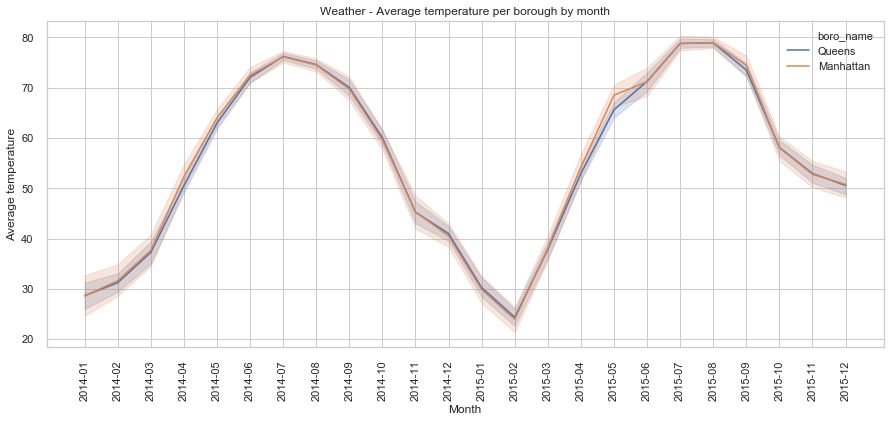

In [26]:
weather['month_dt'] = weather['month_dt'].astype('str')
fig, ax = plt.subplots(figsize = plotsize)
m = sns.lineplot(x="month_dt", y="avg_temp", hue = 'boro_name', data=weather, ax=ax)
ax.set(xlabel='Month', ylabel='Average temperature')
#ax.set_xticks(np.arange(0, 24,1))
plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Weather - Average temperature per borough by month');
path = 'Results'
plt.savefig(path + '/Images/weather_avgtemp_borough_month.png')

In [17]:
weather_month = weather.groupby(['month_dt', 'boro_name'])['precipitation'].mean().reset_index(name = 'avg_precipitation')
weather_month.head()

,month_dt,boro_name,avg_precipitation
0,2014-01,Manhattan,0.090000
1,2014-01,Queens,0.112272
2,2014-02,Manhattan,0.204096
3,2014-02,Queens,0.199788
4,2014-03,Manhattan,0.130672


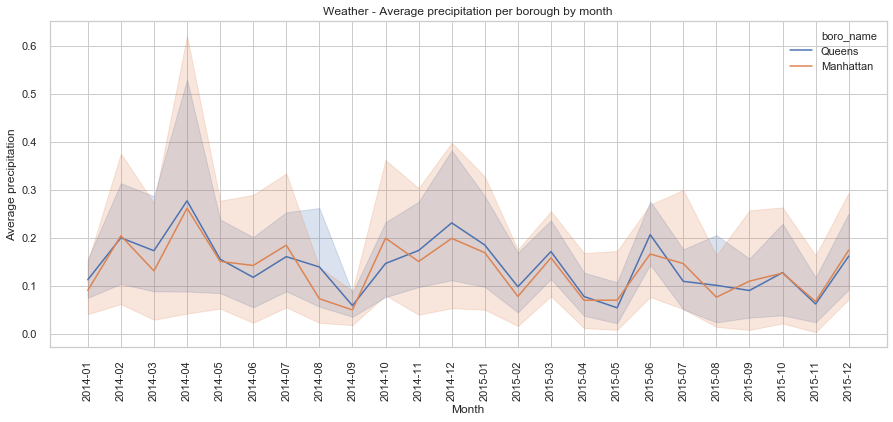

In [23]:
weather['month_dt'] = weather['month_dt'].astype('str')
fig, ax = plt.subplots(figsize = plotsize)
m = sns.lineplot(x="month_dt", y="precipitation", hue = 'boro_name', data=weather, ax=ax)
ax.set(xlabel='Month', ylabel='Average precipitation')
#ax.set_xticks(np.arange(0, 24,1))
plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Weather - Average precipitation per borough by month');
path = 'Results'
plt.savefig(path + '/Images/weather_avgprec_borough_month.png')

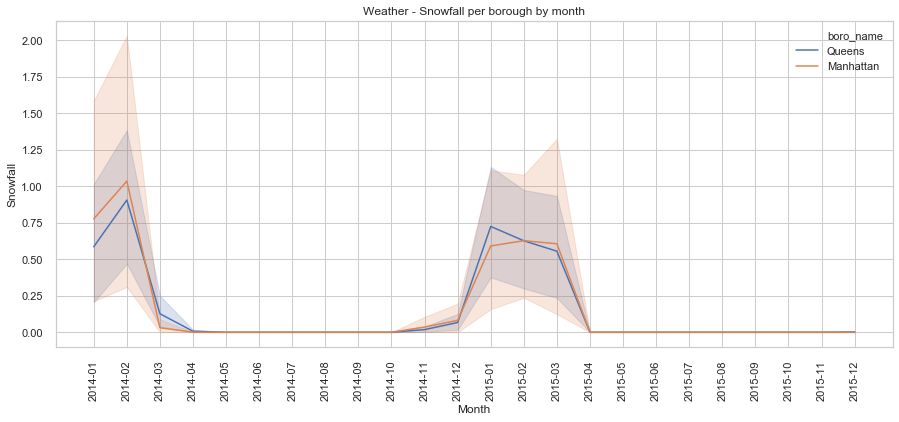

In [24]:
weather['month_dt'] = weather['month_dt'].astype('str')
fig, ax = plt.subplots(figsize = plotsize)
m = sns.lineplot(x="month_dt", y="snowfall", hue = 'boro_name', data=weather, ax=ax)
ax.set(xlabel='Month', ylabel='Snowfall')
#ax.set_xticks(np.arange(0, 24,1))
plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Weather - Snowfall per borough by month');
path = 'Results'
plt.savefig(path + '/Images/weather_snowfall_borough_month.png')

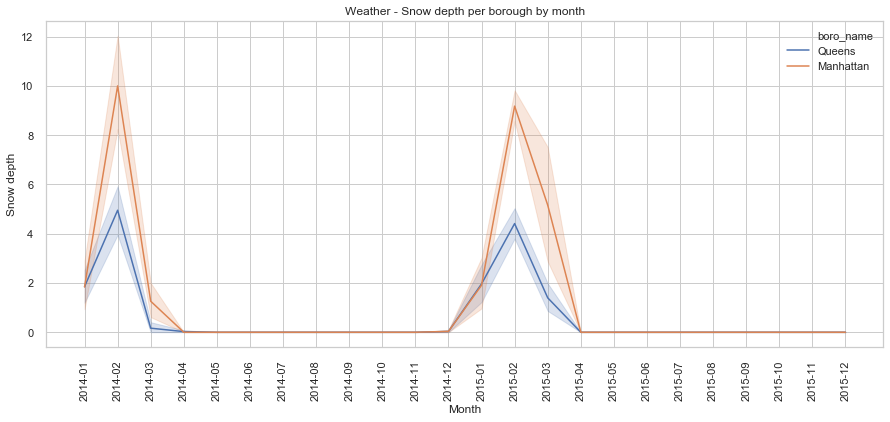

In [25]:
weather['month_dt'] = weather['month_dt'].astype('str')
fig, ax = plt.subplots(figsize = plotsize)
m = sns.lineplot(x="month_dt", y="snow_depth", hue = 'boro_name', data=weather, ax=ax)
ax.set(xlabel='Month', ylabel='Snow depth')
#ax.set_xticks(np.arange(0, 24,1))
plt.xticks(rotation=90);
plt.xticks
#plt.ylim(0, 18000)
plt.title('Weather - Snow depth per borough by month');
path = 'Results'
plt.savefig(path + '/Images/weather_snow_depth_borough_month.png')